# Dataset Size Study w/ ExtraTreesRegressor with Cross_Validade:

## Load the Training & Validation Sets:

In [196]:
#Load Training and Validation sets:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate
import csv
import sys
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import gc

trainBench = pd.read_csv("c:/Benchmarking/trainBench.csv")
#testBench = pd.read_csv("c:/Benchmarking/testBench.csv")
validBench = pd.read_csv("c:/Benchmarking/validBench.csv")

SplitPoint=len(trainBench.index) #SplitPoint = trainBench.shape[0] #trainBench.count(axis=0)
print("SplitPoint: ",SplitPoint)

df = pd.concat([trainBench,validBench],axis=0)
del trainBench, validBench
gc.collect()

df = df.drop("ID", axis=1)
Int64columns = df.select_dtypes(['int64']).columns
#Int64columns
df[Int64columns] = df[Int64columns].astype(np.int32)
#df['Date']=pd.to_datetime(dict(year=df['Year'], month=df['Month (number)'], day=df['Day of month']))
#numerical enconde Assortment type & Store Type
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].astype('category')
#print("Categorical Columns:")
#print(df.select_dtypes(['category']).columns)
#print(" ")
#print(" ")
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

#print("Categorical Columns:")
#print(df.select_dtypes(['category']).columns)
#print(" ")
#print(" ")

trainBench, validBench = df.iloc[:SplitPoint, :], df.iloc[SplitPoint:, :]
print("Training Set shape",trainBench.shape)
print("Validation Set shape",validBench.shape)
del df
gc.collect()

print(" ")
print(" ")
print("Train Data Type Descriptions:")
TrainDataTypes=trainBench.dtypes
#print(TrainDataTypes)
print(trainBench.info())
print(" ")
print(" ")
#print(validBench.info())

# Split Features and Responses
mask = trainBench.columns.difference(['NumberOfSales'])
trainDataset_X = trainBench[mask]
#print(" ")
#print(" ")
print("Feature Columns:")
print(mask)
trainDataset_y = trainBench['NumberOfSales']
#print("Head of Validation Data:")
#print(validBench.head(3))
#print(" ")
#print(mask)
validBench_X = validBench[mask]
validBench_y = validBench['NumberOfSales']
#CatCols=[trainBench.columns.get_loc(c) for c in trainBench.select_dtypes(['category']).columns if c in trainBench]
del trainBench, validBench
gc
import platform
import sys
OpSys=platform.system()[:3]
print(OpSys)
OpSysVer=platform.release()
print(OpSysVer)
LangVer=sys.version[:5]
print(LangVer)
import sklearn
Lib='sklearn'
print(Lib)
LibVer= sklearn.__version__
print(LibVer)

from openpyxl import load_workbook
workbook_name = 'C:\\Benchmarking\\AlgoPerf.xlsx'
def xlsADD(row):
    wb = load_workbook(workbook_name)
    page = wb.active
    page.append(row)
    wb.save(filename=workbook_name) 

def InsertHeader():
    Result=('OpSys','OpVer', 
            'Lang', 
            'LangVer', 
            'Lib', 
            'Lib.Ver', 
            'Algo',
            'M_FitTime', 
            'XVR_FitTime',
            'XVR_ScorTime',
            'XV_Time',
            'XV_EV',
            'XV_MAE', 
            'XV_MSE', 
            'XV_RMSE', 
            'XV_R2',
            'TS_PredTime',
            'TS_EV',
            'TS_MAE', 
            'TS_MSE', 
            'TS_RMSE', 
            'TS_R2',
            'MeanEV',
            'MdlParam', 
            'FeatImp',
            'TdTypes',
            'Comments')
    #print(Result)
    xlsADD(Result)
    
def InsertValues():
    Result=(OpSys, 
            OpSysVer, 
            'Python', 
            LangVer, 
            Lib, 
            LibVer,
            Algo,
            M_FitTime, 
            XVR_FT,
            ST,
            XValidTime,
            EV,
            MAE, 
            MSE, 
            RMSE, 
            R2,
            PredTime,
            EVv,
            MAEv, 
            MSEv, 
            RMSEv, 
            R2v,
            EVtot.mean(),
            str(Params), 
            str(d),
            str(TrainDataTypes),
            Comments)
    #print(Result)
    xlsADD(Result)


SplitPoint:  100553
Training Set shape (100553, 18)
Validation Set shape (20405, 18)
 
 
Train Data Type Descriptions:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100553 entries, 0 to 100552
Data columns (total 18 columns):
StoreID                 100553 non-null int32
IsHoliday               100553 non-null int32
IsOpen                  100553 non-null int32
HasPromotions           100553 non-null int32
StoreType               100553 non-null int8
AssortmentType          100553 non-null int8
NearestCompetitor       100553 non-null int32
Region                  100553 non-null int32
NumberOfSales           100553 non-null int32
Region_AreaKM2          100553 non-null int32
Region_GDP              100553 non-null int32
Region_PopulationK      100553 non-null int32
Year                    100553 non-null int32
Month (number)          100553 non-null int32
Week                    100553 non-null int32
Day of year             100553 non-null int32
Day of month            100553 non-n

## Cross Validate and Score

In [215]:
#Cross Validate and Score
params={}
def CrossEval(SplitPercent=20,MdlParams={}, verbose=False):
    #**************Insert comments about this run here:
    global Comments
    #Comments='n_estimators=250, max_features=n_features-15, max_depth = 15, '+ str(SplitPercent)+'% of the training data'
    global Algo
    Algo='ExtraTreesRegressor'
    Nrows,Ncols=trainDataset_X.shape
    SplitPoint=int(Nrows*(SplitPercent/100))
    X, y = trainDataset_X.iloc[:SplitPoint, :], trainDataset_y.iloc[:SplitPoint]
    #if verbose: 
    print("Training data set shape:",X.shape)
    start=time.time()
    forest = ExtraTreesRegressor(n_estimators=240, 
                                 max_features = int(X.columns.size - 15),
                                 max_depth = 16,
                                 n_jobs=-1, 
                                 random_state=0)
    if MdlParams != {}:
        forest.set_params(**MdlParams)
    
    forest.fit(X, y)
    global M_FitTime, XValidTime, PredTime
    M_FitTime = time.time() - start
    if verbose:print("Measured Fit Time: ", M_FitTime)

    UseTScv=True
    if UseTScv:
        from sklearn.model_selection import TimeSeriesSplit
        if verbose:print("Using Time Series Cross Validation")
        start=time.time()
        tscv = TimeSeriesSplit(n_splits=5)
        scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=tscv, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )        
    else:
        from sklearn.model_selection import KFold
        if verbose:print("Using KFold Cross Validation")
        start=time.time()
        kfolds = KFold(n_splits=5,shuffle=False,random_state=0)
        scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=kfolds, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )

    XValidTime = time.time() - start

    if verbose:print(" ")
    if verbose:print("Model Parameters: ")
    global Params
    Params=forest.get_params(deep=True)
    if verbose:print(Params)
    if verbose:print(" "); 
    global EV, MAE, MSE, RMSE, R2,XVR_FT, ST 
    if verbose:print("Cross Validation Performance: ")
    #if verbose:
    print("Cross Validation Time: %0.6f" % (XValidTime))
    EV=scores['test_explained_variance'].mean()
    if verbose:print(scores['test_explained_variance'])
    if verbose:print("EV: %0.6f" % (EV))
    #MAE is less sensitive to outliers, The contant value that minimizes the MAE is the median of the target values
    if verbose:print(-1*scores['test_neg_mean_absolute_error'])
    MAE=-1*scores['test_neg_mean_absolute_error'].mean()
    if verbose:print("MAE: %0.6f" % (MAE))
    #MAE considers outliers, The contant value that minimizes the MSE is the mean of the target values
    #If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
    #It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
    if verbose:print(-1*scores['test_neg_mean_squared_error'])
    MSE=-1*scores['test_neg_mean_squared_error'].mean()
    if verbose:print("MSE: %0.6f" % (MSE))
    if verbose:print(np.sqrt(-1*scores['test_neg_mean_squared_error']))
    RMSE=np.sqrt(-1*scores['test_neg_mean_squared_error'].mean())
    if verbose:print("RMSE: %0.6f" % (RMSE))
    #Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
    if verbose:print("XV R2 Actuals:",scores['test_r2'])
    R2=scores['test_r2'].mean()
    if verbose:print("Cross Validation R2: %0.6f" % (R2))
    if verbose:print("XVR_fit_time Actuals: ", (scores['fit_time']))
    XVR_FT=scores['fit_time'].mean()
    if verbose:print("XVR_fit_time: %0.6f" % (XVR_FT))
    if verbose:print("score_time Actuals: ", (scores['score_time']))      
    ST=scores['score_time'].mean()
    if verbose:print("score_time: %0.6f" % (ST))

    Comments=str(Params)
    
    # Score Validation Set: 
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import r2_score

    start=time.time()
    y_pred=forest.predict(validBench_X)
    PredTime = time.time() - start

    if verbose:print(" ")
    if verbose:print(" ")
    global EVv, MAEv, MSEv, RMSEv, R2v, EVtot
    if verbose:print("Prediction Time: ", PredTime)
    if verbose:print(" ")
    if verbose:print("Validation data set shape:",validBench_X.shape)
    EVv=explained_variance_score(validBench_y, y_pred)
    if verbose:print("Validation Set Explained Variance (EV): %0.2f" % (EVv))
    #MAE is less sensitive to outliers, The constant value that minimizes the MAE is the median of the target values
    MAEv=mean_absolute_error(validBench_y, y_pred)
    if verbose:print("MAE: %0.6f" % (MAEv))
    #MAE considers outliers, The contant value that minimizes the MSE is the mean of the target values
    #If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
    #It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
    MSEv=mean_squared_error(validBench_y, y_pred)
    if verbose:print("MSE: %0.6f" % (MSEv))
    RMSEv=np.sqrt(MSEv)
    if verbose:print("RMSE: %0.6f" % (RMSEv))
    #Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
    R2v=r2_score(validBench_y, y_pred)
    if verbose:print("Validation Set R2: %0.6f" % (R2v))
    EVtot=scores['test_explained_variance'].copy()
    EVtot = np.append(EVtot,EVv)
    EVtotMean=EVtot.mean()
    if verbose:print("Total Mean EV: ",EVtot,EVtotMean)
    
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    if verbose:print(" ")
    if verbose:print(" ")
    if verbose:print("Feature Importances:")
    global d
    d=[]
    
    for f in range(X.shape[1]):
        if verbose:print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))
        d.append({"%d. feat: %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]])})
    if verbose:print(" ")
    if verbose:print("Validation Set EV, XVal EV, Mean EV: ",EVv, EV, EVtotMean)
    #InsertHeader()
    #InsertValues()
    return EVv, EV, EVtotMean, R2v, R2 

In [210]:
#This version of CrossEval takes the Model as a parameter (Mdl)
#Cross Validate and Score
params={}
def CrossEval2(SplitPercent=20,Mdl=ExtraTreesRegressor,MdlParams={}, verbose=False):
    #**************Insert comments about this run here:
    global Comments
    #Comments='n_estimators=250, max_features=n_features-15, max_depth = 15, '+ str(SplitPercent)+'% of the training data'
    global Algo
    Algo=Mdl.__name__
    if verbose: print("Current Model: ", Algo)
    Nrows,Ncols=trainDataset_X.shape
    SplitPoint=int(Nrows*(SplitPercent/100))
    X, y = trainDataset_X.iloc[:SplitPoint, :], trainDataset_y.iloc[:SplitPoint]
    #if verbose: 
    print("Training data set shape:",X.shape)
    start=time.time()
    
    forest = Mdl()
    
    if MdlParams != {}:
        forest.set_params(**MdlParams)
    else:
        forest.set_params(n_estimators=240, 
                          max_features = int(X.columns.size - 15),
                          max_depth = 16,
                          n_jobs=-1, 
                          random_state=0)
    
    forest.fit(X, y)
    global M_FitTime, XValidTime, PredTime
    M_FitTime = time.time() - start
    if verbose:print("Measured Fit Time: ", M_FitTime)

    UseTScv=True
    if UseTScv:
        from sklearn.model_selection import TimeSeriesSplit
        if verbose:print("Using Time Series Cross Validation")
        start=time.time()
        tscv = TimeSeriesSplit(n_splits=5)
        scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=tscv, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )        
    else:
        from sklearn.model_selection import KFold
        if verbose:print("Using KFold Cross Validation")
        start=time.time()
        kfolds = KFold(n_splits=5,shuffle=False,random_state=0)
        scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=kfolds, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )

    XValidTime = time.time() - start

    if verbose:print(" ")
    if verbose:print("Model Parameters: ")
    global Params
    Params=forest.get_params(deep=True)
    if verbose:print(Params)
    if verbose:print(" "); 
    global EV, MAE, MSE, RMSE, R2,XVR_FT, ST 
    if verbose:print("Cross Validation Performance: ")
    #if verbose:
    print("Cross Validation Time: %0.6f" % (XValidTime))
    EV=scores['test_explained_variance'].mean()
    if verbose:print(scores['test_explained_variance'])
    if verbose:print("EV: %0.6f" % (EV))
    #MAE is less sensitive to outliers, The contant value that minimizes the MAE is the median of the target values
    if verbose:print(-1*scores['test_neg_mean_absolute_error'])
    MAE=-1*scores['test_neg_mean_absolute_error'].mean()
    if verbose:print("MAE: %0.6f" % (MAE))
    #MAE considers outliers, The contant value that minimizes the MSE is the mean of the target values
    #If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
    #It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
    if verbose:print(-1*scores['test_neg_mean_squared_error'])
    MSE=-1*scores['test_neg_mean_squared_error'].mean()
    if verbose:print("MSE: %0.6f" % (MSE))
    if verbose:print(np.sqrt(-1*scores['test_neg_mean_squared_error']))
    RMSE=np.sqrt(-1*scores['test_neg_mean_squared_error'].mean())
    if verbose:print("RMSE: %0.6f" % (RMSE))
    #Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
    if verbose:print("XV R2 Actuals:",scores['test_r2'])
    R2=scores['test_r2'].mean()
    if verbose:print("Cross Validation R2: %0.6f" % (R2))
    if verbose:print("XVR_fit_time Actuals: ", (scores['fit_time']))
    XVR_FT=scores['fit_time'].mean()
    if verbose:print("XVR_fit_time: %0.6f" % (XVR_FT))
    if verbose:print("score_time Actuals: ", (scores['score_time']))      
    ST=scores['score_time'].mean()
    if verbose:print("score_time: %0.6f" % (ST))

    Comments=str(Params)
    
    # Score Validation Set: 
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import r2_score

    start=time.time()
    y_pred=forest.predict(validBench_X)
    PredTime = time.time() - start

    if verbose:print(" ")
    if verbose:print(" ")
    global EVv, MAEv, MSEv, RMSEv, R2v, EVtot
    if verbose:print("Prediction Time: ", PredTime)
    if verbose:print(" ")
    if verbose:print("Validation data set shape:",validBench_X.shape)
    EVv=explained_variance_score(validBench_y, y_pred)
    if verbose:print("Validation Set Explained Variance (EV): %0.2f" % (EVv))
    #MAE is less sensitive to outliers, The constant value that minimizes the MAE is the median of the target values
    MAEv=mean_absolute_error(validBench_y, y_pred)
    if verbose:print("MAE: %0.6f" % (MAEv))
    #MAE considers outliers, The contant value that minimizes the MSE is the mean of the target values
    #If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
    #It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
    MSEv=mean_squared_error(validBench_y, y_pred)
    if verbose:print("MSE: %0.6f" % (MSEv))
    RMSEv=np.sqrt(MSEv)
    if verbose:print("RMSE: %0.6f" % (RMSEv))
    #Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
    R2v=r2_score(validBench_y, y_pred)
    if verbose:print("Validation Set R2: %0.6f" % (R2v))
    EVtot=scores['test_explained_variance'].copy()
    EVtot = np.append(EVtot,EVv)
    EVtotMean=EVtot.mean()
    if verbose:print("Total Mean EV: ",EVtot,EVtotMean)
    
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    if verbose:print(" ")
    if verbose:print(" ")
    if verbose:print("Feature Importances:")
    global d
    d=[]
    
    for f in range(X.shape[1]):
        if verbose:print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))
        d.append({"%d. feat: %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]])})
    if verbose:print(" ")
    if verbose:print("Validation Set EV, XVal EV, Mean EV: ",EVv, EV, EVtotMean)
    #InsertHeader()
    #InsertValues()
    return EVv, EV, EVtotMean,R2v,R2

In [211]:
from sklearn.ensemble import RandomForestRegressor
MdlParams={}
Mdl=ExtraTreesRegressor
CrossEval2(100, Mdl=Mdl, MdlParams=MdlParams,verbose=True,)

Current Model:  ExtraTreesRegressor
Training data set shape: (100553, 17)
Measured Fit Time:  3.005171537399292
Using Time Series Cross Validation
 
Model Parameters: 
{'bootstrap': False, 'criterion': 'mse', 'max_depth': 16, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 240, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 
Cross Validation Performance: 
Cross Validation Time: 29.462414
[0.6893979  0.55408824 0.64868223 0.67215276 0.39283517]
EV: 0.591431
[ 965.77104548 1290.12103312 1130.37150079 1032.344633   1251.99564222]
MAE: 1134.120771
[2031006.19284856 3981787.24555979 2449460.21873086 2362433.8414521
 6041839.27572217]
MSE: 3373305.354863
[1425.1337456  1995.44161668 1565.07514795 1537.02109337 2458.01531234]
RMSE: 1836.656025
XV R2 Actuals: [0.66915499 0.55369165 0.64824639 0.67212614 0.

(0.6803452671668492,
 0.5914312586047856,
 0.6062502600317962,
 0.667063798808587,
 0.5871554790932797)

# Size Study: 

In [89]:
SampleSizes = [20, 30, 40, 50, 60, 70, 80, 90] 
for i in SampleSizes:
    CrossEval(i)

Training data set shape: (20110, 17)
Measured Fit Time:  0.8934476375579834
Using Time Series Cross Validation
 
 
Cross Validation Performance: 
Cross Validation Time: 23.826221
[0.68329983 0.55466659 0.65183528 0.66779217 0.39102993]
EV: 0.589725
[ 976.44519848 1292.50419848 1133.46605205 1044.31633422 1269.88681822]
MAE: 1143.323720
[2070151.61218798 3975607.97450234 2425820.47504332 2393693.14476846
 6059182.7266187 ]
MSE: 3384891.186624
[1438.80214491 1993.89266875 1557.50456662 1547.15647068 2461.54072211]
RMSE: 1839.807378
XV R2 Actuals: [0.66277831 0.55438427 0.65164117 0.66778777 0.39081453]
Cross Validation R2: 0.585481
XVR_fit_time Actuals:  [1.18125725 1.64521885 2.16161036 2.51963973 3.08020592]
XVR_fit_time: 2.117586
score_time Actuals:  [0.87560153 0.87660193 0.85982919 0.8892014  0.87360144]
score_time: 0.874967
 
 
Prediction Time:  0.2184004783630371
 
Validation data set shape: (20405, 17)
Validation Set Explained Variance (EV): 0.67
MAE: 1021.464769
MSE: 1963549.971

Training data set shape: (70387, 17)
Measured Fit Time:  1.912212610244751
Using Time Series Cross Validation
 
 
Cross Validation Performance: 
Cross Validation Time: 23.698446
[0.68329983 0.55466659 0.65183528 0.66779217 0.39102993]
EV: 0.589725
[ 976.44519848 1292.50419848 1133.46605205 1044.31633422 1269.88681822]
MAE: 1143.323720
[2070151.61218798 3975607.97450234 2425820.47504332 2393693.14476846
 6059182.7266187 ]
MSE: 3384891.186624
[1438.80214491 1993.89266875 1557.50456662 1547.15647068 2461.54072211]
RMSE: 1839.807378
XV R2 Actuals: [0.66277831 0.55438427 0.65164117 0.66778777 0.39081453]
Cross Validation R2: 0.585481
XVR_fit_time Actuals:  [1.16980362 1.57860303 2.10600376 2.49700451 3.02880645]
XVR_fit_time: 2.076044
score_time Actuals:  [0.87360168 0.8892014  0.8766017  0.89420176 0.87360168]
score_time: 0.881442
 
 
Prediction Time:  0.2184004783630371
 
Validation data set shape: (20405, 17)
Validation Set Explained Variance (EV): 0.62
MAE: 1132.892700
MSE: 2329374.4672

# Pattern Search Hooke-Jeeves Method:
## References:
https://www.mathworks.com/videos/global-optimization-toolbox-overview-73470.html

https://www.youtube.com/watch?v=b-ob1sfXOTk&t=1823s

In [216]:
class Dimension():
    def __init__(self, value):
        #If value is a Tuple, divide the interval into "length" equaly spaced intervals:
        if isinstance(value,tuple):
           lower=value[0];upper=value[1];length=value[2]
           value=[lower + x*(upper-lower)/(length-1) for x in range(length)]
        self.value=value
        self.value.sort()
        self.min=self.value[0]
        self.max=self.value[-1]
        self.midptidx=int((len(self.value)/2)-0.5)
        self.midpoint=self.value[self.midptidx]
        self.Delta=(len(value)-1)-self.midptidx
        self.BestValue=self.midpoint
        self.CurrIndex=self.midptidx
        self.BestIndex=self.midptidx

# Space={'n_estimators':Dimension([230,240,250]),
#        'max_features':Dimension([2,3]),
#        'max_depth':Dimension([16,17,30])}

Space={'n_estimators':Dimension([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260]),
        'max_features':Dimension([2,3,4]),
        'max_depth':Dimension([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])}
                                

## Pattern Search Result:
Do not use the run below to compare with Baysian opt, and Random search. It uses a custom metric.

In [217]:
PercentToUse=100
alfa=2;Episilon=0.001;k=0
Delta=[]
Delta.append(2)
#len(Space)
#print(list(Space.keys())[0])
#list(Space.values())[0].midpoint

#print(list(Space.values())[0].min)
#print(list(Space.values())[0].midpoint)
#print(list(Space.values())[0].max)
#print(list(Space.values())[0].midptidx)
print(list(Space.values())[0].Delta,list(Space.values())[1].Delta,list(Space.values())[2].Delta)
print(" ");print(" ")

xc={}
#builds the first exploratory point by collecting the midpoint of each dimension:
for Dkey, Dval in Space.items():
    xc[Dkey]=Dval.midpoint
print(xc)    
BestScore,_,_,_,_=CrossEval(PercentToUse,xc)
cols=list(xc.keys())
cols.append('score')
df=pd.DataFrame(columns=cols)
xc.update({'score':BestScore})
df=df.append(xc, ignore_index=True)
print(df)

Ndimensions=len(Space);  
BestIdx=0; InitialExploration=0

# i=exploratory moves iterations; k=Overall Iterations
i=0; Continue=0

while Continue<3:
    #Exploratory Search:
    while i < Ndimensions:
        k+=1
        for Direction in [1,-1]:
            xn={}; xd={}
            for CurDim in range(0,Ndimensions): #Build the vextor xn:
                if i == CurDim:
                    NewIndex=list(Space.values())[CurDim].CurrIndex + Direction*list(Space.values())[CurDim].Delta
                    #print(NewIndex)
                    if NewIndex>len(list(Space.values())[CurDim].value)-1: NewIndex=len(list(Space.values())[CurDim].value)-1
                    if NewIndex<0: NewIndex=0
                    xn[list(Space.keys())[CurDim]]=list(Space.values())[CurDim].value[NewIndex]
                else:
                    xn[list(Space.keys())[CurDim]]=list(Space.values())[CurDim].BestValue
            if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
                #print("Vetor",xn," nao esta em df. Executando Random Forest")
                print(Direction, xn)            
                CurrScore,_,_,_,_=CrossEval(PercentToUse,xn)
                #cols=list(xn.keys())
                #cols.append('score')
                xd=xn.copy()
                xd.update({'score':CurrScore})
                df=df.append(xd, ignore_index=True)
                print(df)
                #print(CurrScore)
                if CurrScore > BestScore: 
                    BestScore=CurrScore
                    list(Space.values())[i].BestValue=list(Space.values())[i].value[NewIndex]
                    list(Space.values())[i].BestIndex=NewIndex
                    xc=xn.copy()
                    BestIdx=k
                    break
        list(Space.values())[i].CurrIndex=list(Space.values())[i].BestIndex 
        i+=1

    #xc={}
    #for Dkey, Dval in Space.items():
    #    xc[Dkey]=Dval.BestValue
    #print(xc)

    #pattern move:
    pm=df.values[BestIdx]+(df.values[BestIdx]-df.values[InitialExploration])
    pm=pm[0:(len(pm)-1)]
    print(pm)

    #picks the closest elements in the lists to the ideal point
    n=0
    for Dkey, Dval in Space.items():
        xn[Dkey]=min(Dval.value, key=lambda x:abs(x-pm[n])) 
        n+=1

    #Evaluates pattern move it it has not been evaluated already:
    if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
        print(xn)
        print("Executing Pattern Move...")
        k+=1
        CurrScore,_,_,_,_=CrossEval(PercentToUse,xn)
        xd=xn.copy()
        xd.update({'score':CurrScore})
        df=df.append(xd, ignore_index=True)
        print(df)
        if CurrScore > BestScore:
            BestScore=CurrScore
            xc=xn.copy()
            for CurDim in range(0,Ndimensions):
                list(Space.values())[CurDim].BestIndex=list(Space.values())[CurDim].value.index(list(xc.values())[CurDim])
                list(Space.values())[CurDim].CurrIndex=list(Space.values())[CurDim].BestIndex
                list(Space.values())[CurDim].BestValue=list(xc.values())[CurDim]
            BestIdx=k
            InitialExploration=BestIdx
            BestScore=CurrScore
        else:
            #divide delta by 2
            DeltaVector=[]
            for CurDim in range(0,Ndimensions):
                list(Space.values())[CurDim].Delta=int(0.5+list(Space.values())[CurDim].Delta/alfa)
                DeltaVector.append(list(Space.values())[CurDim].Delta)
    else:
        #divide delta by 2
        print("Pattern move point",xn," has been evaluated")
        DeltaVector=[]
        for CurDim in range(0,Ndimensions):
            list(Space.values())[CurDim].Delta=int(0.5+list(Space.values())[CurDim].Delta/alfa)
            if list(Space.values())[CurDim].Delta==0: list(Space.values())[CurDim].Delta=1
            DeltaVector.append(list(Space.values())[CurDim].Delta)

    print("Current Delta values for each dimension: ",DeltaVector)
    i=0 
    if DeltaVector==list(np.ones(3)): Continue+=1

print("Best Parameters Found:")
df.loc[df['score'].idxmax()]

13 1 6
 
 
{'n_estimators': 130, 'max_features': 3, 'max_depth': 11}
Training data set shape: (100553, 17)
Cross Validation Time: 10.019557
   n_estimators  max_features  max_depth     score
0         130.0           3.0       11.0  0.669828
1 {'n_estimators': 260, 'max_features': 3, 'max_depth': 11}
Training data set shape: (100553, 17)
Cross Validation Time: 17.488428
   n_estimators  max_features  max_depth     score
0         130.0           3.0       11.0  0.669828
1         260.0           3.0       11.0  0.667675
-1 {'n_estimators': 10, 'max_features': 3, 'max_depth': 11}
Training data set shape: (100553, 17)
Cross Validation Time: 4.982781
   n_estimators  max_features  max_depth     score
0         130.0           3.0       11.0  0.669828
1         260.0           3.0       11.0  0.667675
2          10.0           3.0       11.0  0.666677
1 {'n_estimators': 130, 'max_features': 4, 'max_depth': 11}
Training data set shape: (100553, 17)
Cross Validation Time: 10.952114
   n_esti

Cross Validation Time: 10.806602
    n_estimators  max_features  max_depth     score
0          130.0           3.0       11.0  0.669828
1          260.0           3.0       11.0  0.667675
2           10.0           3.0       11.0  0.666677
3          130.0           4.0       11.0  0.662589
4          130.0           2.0       11.0  0.653970
5          130.0           3.0       17.0  0.677176
6          200.0           3.0       17.0  0.673282
7           60.0           3.0       17.0  0.674194
8          130.0           4.0       17.0  0.668283
9          130.0           2.0       17.0  0.675931
10         130.0           3.0       14.0  0.679214
11         260.0           3.0       17.0  0.674337
12         170.0           3.0       14.0  0.678599
13          90.0           3.0       14.0  0.681470
14          90.0           4.0       14.0  0.664441
-1 {'n_estimators': 90, 'max_features': 2, 'max_depth': 14}
Training data set shape: (100553, 17)
Cross Validation Time: 12.665132
    

Cross Validation Time: 10.641041
    n_estimators  max_features  max_depth     score
0          130.0           3.0       11.0  0.669828
1          260.0           3.0       11.0  0.667675
2           10.0           3.0       11.0  0.666677
3          130.0           4.0       11.0  0.662589
4          130.0           2.0       11.0  0.653970
5          130.0           3.0       17.0  0.677176
6          200.0           3.0       17.0  0.673282
7           60.0           3.0       17.0  0.674194
8          130.0           4.0       17.0  0.668283
9          130.0           2.0       17.0  0.675931
10         130.0           3.0       14.0  0.679214
11         260.0           3.0       17.0  0.674337
12         170.0           3.0       14.0  0.678599
13          90.0           3.0       14.0  0.681470
14          90.0           4.0       14.0  0.664441
15          90.0           2.0       14.0  0.679485
16          90.0           3.0       16.0  0.675377
17          90.0           3.0 

n_estimators    100.000000
max_features      3.000000
max_depth        14.000000
score             0.682144
Name: 22, dtype: float64

In [17]:
k=5
pm=df.values[k]+(df.values[k]-df.values[k-i])
pm=pm[0:3]
n=0
for Dkey, Dval in Space.items():
    xc[Dkey]=min(Dval.value, key=lambda x:abs(x-pm[n])) #picks the closes elements in the lists to the ideal point
    n+=1
print(xc)

{'n_estimators': 240, 'max_features': 2, 'max_depth': 18}


# Sklearn RandomizedSearchCV

In [149]:
#Randomize Search:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import RandomForestRegressor

# Load data
X, y = trainDataset_X, trainDataset_y
#del(trainDataset_X, trainDataset_y)

# build model
n_iter_search = 15
#clf = GradientBoostingRegressor(verbose=1,
#                                loss="ls",
#                                n_iter_no_change=3,
#                                tol=0.1,
#                                random_state=0)
#param_dist = {"n_estimators": [31,37], #sp_randint(37),
#              "max_depth": [4,5],
#              "max_features": [12],
#              "min_samples_split": [5,10],
#              "min_samples_leaf" : [1,2]
#              }

clf = ExtraTreesRegressor(n_estimators=240, 
                                 max_features = int(X.columns.size - 15),
                                 max_depth = 16,
                                 n_jobs=-1, 
                                 random_state=0)

# specify parameters and distributions to sample from
# param_dist={'n_estimators':[230,240,250],
#        'max_features':[2,3],
#        'max_depth':[16,17,30]}

# param_dist={'n_estimators':[20,25,30,35],
#        'max_features':[2,3,4],
#        'max_depth':list(range(5,18,1))}

param_dist={#'n_estimators':[20,25,30,35],
       'max_features':[2,3,4],
       'n_estimators': list(np.linspace(0, 250, num=26, endpoint=True,dtype=int)+10),
       #'lr':list(np.logspace(-2, -5, num=4, endpoint=True, base=10.0)),
       'max_depth':list(range(5,18,1))}

# Utility function to report best scores
def report(results, n_top=14):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

from sklearn.model_selection import TimeSeriesSplit
print("Using Time Series Cross Validation")
tscv = TimeSeriesSplit(n_splits=5)
#scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=tscv, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )        


# run randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=tscv, n_jobs=-1, verbose=1)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Using Time Series Cross Validation
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   14.7s finished


RandomizedSearchCV took 15.22 seconds for 14 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.571 (std: 0.096)
Parameters: {'n_estimators': 25, 'max_features': 4, 'max_depth': 13}

Model with rank: 2
Mean validation score: 0.571 (std: 0.102)
Parameters: {'n_estimators': 30, 'max_features': 4, 'max_depth': 13}

Model with rank: 3
Mean validation score: 0.567 (std: 0.107)
Parameters: {'n_estimators': 30, 'max_features': 2, 'max_depth': 14}

Model with rank: 4
Mean validation score: 0.566 (std: 0.099)
Parameters: {'n_estimators': 35, 'max_features': 3, 'max_depth': 12}

Model with rank: 5
Mean validation score: 0.562 (std: 0.101)
Parameters: {'n_estimators': 20, 'max_features': 3, 'max_depth': 15}

Model with rank: 6
Mean validation score: 0.559 (std: 0.104)
Parameters: {'n_estimators': 30, 'max_features': 3, 'max_depth': 10}

Model with rank: 7
Mean validation score: 0.557 (std: 0.107)
Parameters: {'n_estimators': 20, 'max_features': 3, 'max_depth': 16}

Model w

In [176]:
df=pd.DataFrame(pattern_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.002013,0.963433,0.591733,0.403261,3,130,11,"{'max_features': 3, 'n_estimators': 130, 'max_...",0.640238,0.535233,0.648533,0.648520,0.368516,0.568208,0.108678,16
1,1.478182,0.674848,0.338019,0.240745,4,130,11,"{'max_features': 4, 'n_estimators': 130, 'max_...",0.642258,0.542479,0.638197,0.652713,0.382582,0.571646,0.102550,15
2,4.601562,2.191038,0.864249,0.487595,4,260,11,"{'max_features': 4, 'n_estimators': 260, 'max_...",0.640165,0.542508,0.639291,0.655306,0.382932,0.572041,0.102694,14
3,9.006999,3.511457,1.129763,0.632418,4,260,11,"{'max_features': 4, 'n_estimators': 260, 'max_...",0.655224,0.553209,0.595521,0.666836,0.405489,0.575256,0.094339,13
4,8.237663,2.994531,1.137862,0.604569,3,260,17,"{'max_features': 3, 'n_estimators': 260, 'max_...",0.658834,0.558860,0.618489,0.672638,0.396209,0.581006,0.100498,10
5,7.405416,3.277567,1.614790,1.104725,3,190,17,"{'max_features': 3, 'n_estimators': 190, 'max_...",0.658494,0.557957,0.613764,0.672873,0.394115,0.579441,0.100960,11
6,5.701912,2.186335,1.008354,0.616404,4,260,17,"{'max_features': 4, 'n_estimators': 260, 'max_...",0.654948,0.549471,0.640972,0.661926,0.388270,0.579117,0.103668,12
7,7.350215,2.741219,1.138364,0.642395,2,260,17,"{'max_features': 2, 'n_estimators': 260, 'max_...",0.667912,0.552474,0.638144,0.676205,0.398187,0.586584,0.103886,5
8,6.230042,2.223738,1.041753,0.655505,2,220,17,"{'max_features': 2, 'n_estimators': 220, 'max_...",0.667595,0.552820,0.636216,0.676780,0.399435,0.586569,0.103273,6
9,5.805129,2.214159,1.122864,0.685136,3,260,17,"{'max_features': 3, 'n_estimators': 260, 'max_...",0.663775,0.554553,0.650008,0.668022,0.389275,0.585127,0.106357,8


## Random Search Result:

In [177]:
random_search
print(random_search.best_params_)
random_search.best_score_

{'n_estimators': 25, 'max_features': 4, 'max_depth': 13}


0.5707034560747144

# Pattern SearchCV Sklearn Stile (Hooke-Jeeves Method):

In [142]:
from abc import ABCMeta, abstractmethod
from collections import defaultdict
from collections.abc import Mapping, Sequence, Iterable
from functools import partial, reduce
from itertools import product
import operator
import time
import warnings

import numpy as np
import pandas as pd
from scipy.stats import rankdata

from sklearn.base import BaseEstimator, is_classifier, clone
from sklearn.base import MetaEstimatorMixin
from sklearn.model_selection._split import check_cv
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection._validation import _aggregate_score_dicts
from sklearn.exceptions import NotFittedError
from sklearn.utils._joblib import Parallel, delayed
from sklearn.utils import check_random_state
from sklearn.utils.fixes import MaskedArray
from sklearn.utils.random import sample_without_replacement
from sklearn.utils.validation import indexable, check_is_fitted
from sklearn.utils.metaestimators import if_delegate_has_method
from sklearn.metrics.scorer import _check_multimetric_scoring
from sklearn.metrics.scorer import check_scoring

class BaseSearchCV2(BaseEstimator, MetaEstimatorMixin, metaclass=ABCMeta):
    """Abstract base class for hyper parameter search with cross-validation.
    """

    @abstractmethod
    def __init__(self, estimator, scoring=None, n_jobs=None, iid='warn',
                 refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs',
                 error_score='raise-deprecating', return_train_score=True):

        self.scoring = scoring
        self.estimator = estimator
        self.n_jobs = n_jobs
        self.iid = iid
        self.refit = refit
        self.cv = cv
        self.verbose = verbose
        self.pre_dispatch = pre_dispatch
        self.error_score = error_score
        self.return_train_score = return_train_score

    @property
    def _estimator_type(self):
        return self.estimator._estimator_type

    def score(self, X, y=None):
        """Returns the score on the given data, if the estimator has been refit.
        This uses the score defined by ``scoring`` where provided, and the
        ``best_estimator_.score`` method otherwise.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Input data, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples] or [n_samples, n_output], optional
            Target relative to X for classification or regression;
            None for unsupervised learning.
        Returns
        -------
        score : float
        """
        self._check_is_fitted('score')
        if self.scorer_ is None:
            raise ValueError("No score function explicitly defined, "
                             "and the estimator doesn't provide one %s"
                             % self.best_estimator_)
        score = self.scorer_[self.refit] if self.multimetric_ else self.scorer_
        return score(self.best_estimator_, X, y)

    def _check_is_fitted(self, method_name):
        if not self.refit:
            raise NotFittedError('This %s instance was initialized '
                                 'with refit=False. %s is '
                                 'available only after refitting on the best '
                                 'parameters. You can refit an estimator '
                                 'manually using the ``best_params_`` '
                                 'attribute'
                                 % (type(self).__name__, method_name))
        else:
            check_is_fitted(self, 'best_estimator_')

    @if_delegate_has_method(delegate=('best_estimator_', 'estimator'))
    def predict(self, X):
        """Call predict on the estimator with the best found parameters.
        Only available if ``refit=True`` and the underlying estimator supports
        ``predict``.
        Parameters
        ----------
        X : indexable, length n_samples
            Must fulfill the input assumptions of the
            underlying estimator.
        """
        self._check_is_fitted('predict')
        return self.best_estimator_.predict(X)

    @if_delegate_has_method(delegate=('best_estimator_', 'estimator'))
    def predict_proba(self, X):
        """Call predict_proba on the estimator with the best found parameters.
        Only available if ``refit=True`` and the underlying estimator supports
        ``predict_proba``.
        Parameters
        ----------
        X : indexable, length n_samples
            Must fulfill the input assumptions of the
            underlying estimator.
        """
        self._check_is_fitted('predict_proba')
        return self.best_estimator_.predict_proba(X)

    @if_delegate_has_method(delegate=('best_estimator_', 'estimator'))
    def predict_log_proba(self, X):
        """Call predict_log_proba on the estimator with the best found parameters.
        Only available if ``refit=True`` and the underlying estimator supports
        ``predict_log_proba``.
        Parameters
        ----------
        X : indexable, length n_samples
            Must fulfill the input assumptions of the
            underlying estimator.
        """
        self._check_is_fitted('predict_log_proba')
        return self.best_estimator_.predict_log_proba(X)

    @if_delegate_has_method(delegate=('best_estimator_', 'estimator'))
    def decision_function(self, X):
        """Call decision_function on the estimator with the best found parameters.
        Only available if ``refit=True`` and the underlying estimator supports
        ``decision_function``.
        Parameters
        ----------
        X : indexable, length n_samples
            Must fulfill the input assumptions of the
            underlying estimator.
        """
        self._check_is_fitted('decision_function')
        return self.best_estimator_.decision_function(X)

    @if_delegate_has_method(delegate=('best_estimator_', 'estimator'))
    def transform(self, X):
        """Call transform on the estimator with the best found parameters.
        Only available if the underlying estimator supports ``transform`` and
        ``refit=True``.
        Parameters
        ----------
        X : indexable, length n_samples
            Must fulfill the input assumptions of the
            underlying estimator.
        """
        self._check_is_fitted('transform')
        return self.best_estimator_.transform(X)

    @if_delegate_has_method(delegate=('best_estimator_', 'estimator'))
    def inverse_transform(self, Xt):
        """Call inverse_transform on the estimator with the best found params.
        Only available if the underlying estimator implements
        ``inverse_transform`` and ``refit=True``.
        Parameters
        ----------
        Xt : indexable, length n_samples
            Must fulfill the input assumptions of the
            underlying estimator.
        """
        self._check_is_fitted('inverse_transform')
        return self.best_estimator_.inverse_transform(Xt)

    @property
    def classes_(self):
        self._check_is_fitted("classes_")
        return self.best_estimator_.classes_

    def _run_search(self, evaluate_candidates):
        """Repeatedly calls `evaluate_candidates` to conduct a search.
        This method, implemented in sub-classes, makes it possible to
        customize the the scheduling of evaluations: GridSearchCV and
        RandomizedSearchCV schedule evaluations for their whole parameter
        search space at once but other more sequential approaches are also
        possible: for instance is possible to iteratively schedule evaluations
        for new regions of the parameter search space based on previously
        collected evaluation results. This makes it possible to implement
        Bayesian optimization or more generally sequential model-based
        optimization by deriving from the BaseSearchCV abstract base class.
        Parameters
        ----------
        evaluate_candidates : callable
            This callback accepts a list of candidates, where each candidate is
            a dict of parameter settings. It returns a dict of all results so
            far, formatted like ``cv_results_``.
        Examples
        --------
        ::
            def _run_search(self, evaluate_candidates):
                'Try C=0.1 only if C=1 is better than C=10'
                all_results = evaluate_candidates([{'C': 1}, {'C': 10}])
                score = all_results['mean_test_score']
                if score[0] < score[1]:
                    evaluate_candidates([{'C': 0.1}])
        """
        raise NotImplementedError("_run_search not implemented.")

    def fit(self, X, y=None, groups=None, **fit_params):
        """Run fit with all sets of parameters.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples] or [n_samples, n_output], optional
            Target relative to X for classification or regression;
            None for unsupervised learning.
        groups : array-like, with shape (n_samples,), optional
            Group labels for the samples used while splitting the dataset into
            train/test set.
        **fit_params : dict of string -> object
            Parameters passed to the ``fit`` method of the estimator
        """
        estimator = self.estimator
        cv = check_cv(self.cv, y, classifier=is_classifier(estimator))

        scorers, self.multimetric_ = _check_multimetric_scoring(
            self.estimator, scoring=self.scoring)

        if self.multimetric_:
            if self.refit is not False and (
                    not isinstance(self.refit, str) or
                    # This will work for both dict / list (tuple)
                    self.refit not in scorers) and not callable(self.refit):
                raise ValueError("For multi-metric scoring, the parameter "
                                 "refit must be set to a scorer key or a "
                                 "callable to refit an estimator with the "
                                 "best parameter setting on the whole "
                                 "data and make the best_* attributes "
                                 "available for that metric. If this is "
                                 "not needed, refit should be set to "
                                 "False explicitly. %r was passed."
                                 % self.refit)
            else:
                refit_metric = self.refit
        else:
            refit_metric = 'score'

        X, y, groups = indexable(X, y, groups)
        n_splits = cv.get_n_splits(X, y, groups)

        base_estimator = clone(self.estimator)

        parallel = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
                            pre_dispatch=self.pre_dispatch)

        fit_and_score_kwargs = dict(scorer=scorers,
                                    fit_params=fit_params,
                                    return_train_score=self.return_train_score,
                                    return_n_test_samples=True,
                                    return_times=True,
                                    return_parameters=False,
                                    error_score=self.error_score,
                                    verbose=self.verbose)
        results = {}
        with parallel:
            all_candidate_params = []
            all_out = []

            def evaluate_candidates(candidate_params):
                candidate_params = list(candidate_params)
                n_candidates = len(candidate_params)

                if self.verbose > 0:
                    print("Fitting {0} folds for each of {1} candidates,"
                          " totalling {2} fits".format(
                              n_splits, n_candidates, n_candidates * n_splits))

                out = parallel(delayed(_fit_and_score)(clone(base_estimator),
                                                       X, y,
                                                       train=train, test=test,
                                                       parameters=parameters,
                                                       **fit_and_score_kwargs)
                               for parameters, (train, test)
                               in product(candidate_params,
                                          cv.split(X, y, groups)))

                if len(out) < 1:
                    raise ValueError('No fits were performed. '
                                     'Was the CV iterator empty? '
                                     'Were there no candidates?')
                elif len(out) != n_candidates * n_splits:
                    raise ValueError('cv.split and cv.get_n_splits returned '
                                     'inconsistent results. Expected {} '
                                     'splits, got {}'
                                     .format(n_splits,
                                             len(out) // n_candidates))

                all_candidate_params.extend(candidate_params)
                all_out.extend(out)

                nonlocal results
                results = self._format_results(
                    all_candidate_params, scorers, n_splits, all_out)
                return results

            self._run_search(evaluate_candidates)

        # For multi-metric evaluation, store the best_index_, best_params_ and
        # best_score_ iff refit is one of the scorer names
        # In single metric evaluation, refit_metric is "score"
        if self.refit or not self.multimetric_:
            # If callable, refit is expected to return the index of the best
            # parameter set.
            if callable(self.refit):
                self.best_index_ = self.refit(results)
                if not isinstance(self.best_index_, (int, np.integer)):
                    raise TypeError('best_index_ returned is not an integer')
                if (self.best_index_ < 0 or
                   self.best_index_ >= len(results["params"])):
                    raise IndexError('best_index_ index out of range')
            else:
                self.best_index_ = results["rank_test_%s"
                                           % refit_metric].argmin()
                self.best_score_ = results["mean_test_%s" % refit_metric][
                                           self.best_index_]
            self.best_params_ = results["params"][self.best_index_]

        if self.refit:
            self.best_estimator_ = clone(base_estimator).set_params(
                **self.best_params_)
            refit_start_time = time()
            if y is not None:
                self.best_estimator_.fit(X, y, **fit_params)
            else:
                self.best_estimator_.fit(X, **fit_params)
            refit_end_time = time()
            self.refit_time_ = refit_end_time - refit_start_time

        # Store the only scorer not as a dict for single metric evaluation
        self.scorer_ = scorers if self.multimetric_ else scorers['score']
        #print("results: ", results)
        self.cv_results_ = results
        self.n_splits_ = n_splits

        return self

    def _format_results(self, candidate_params, scorers, n_splits, out):
        n_candidates = len(candidate_params)
        # if one choose to see train score, "out" will contain train score info
        if self.return_train_score:
            (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,
             score_time) = zip(*out)
        else:
            (test_score_dicts, test_sample_counts, fit_time,
             score_time) = zip(*out)

        # test_score_dicts and train_score dicts are lists of dictionaries and
        # we make them into dict of lists
        test_scores = _aggregate_score_dicts(test_score_dicts)
        
        if self.return_train_score:
            train_scores = _aggregate_score_dicts(train_score_dicts)

        results = {}

        def _store(key_name, array, weights=None, splits=False, rank=False):
            """A small helper to store the scores/times to the cv_results_"""
            # When iterated first by splits, then by parameters
            # We want `array` to have `n_candidates` rows and `n_splits` cols.
            array = np.array(array, dtype=np.float64).reshape(n_candidates,
                                                              n_splits)
            if splits:
                for split_i in range(n_splits):
                    # Uses closure to alter the results
                    results["split%d_%s"
                            % (split_i, key_name)] = array[:, split_i]

            array_means = np.average(array, axis=1, weights=weights)
            results['mean_%s' % key_name] = array_means
            # Weighted std is not directly available in numpy
            array_stds = np.sqrt(np.average((array -
                                             array_means[:, np.newaxis]) ** 2,
                                            axis=1, weights=weights))
            results['std_%s' % key_name] = array_stds

            if rank:
                results["rank_%s" % key_name] = np.asarray(
                    rankdata(-array_means, method='min'), dtype=np.int32)

        _store('fit_time', fit_time)
        _store('score_time', score_time)
        # Use one MaskedArray and mask all the places where the param is not
        # applicable for that candidate. Use defaultdict as each candidate may
        # not contain all the params
        param_results = defaultdict(partial(MaskedArray,
                                            np.empty(n_candidates,),
                                            mask=True,
                                            dtype=object))
        for cand_i, params in enumerate(candidate_params):
            for name, value in params.items():
                # An all masked empty array gets created for the key
                # `"param_%s" % name` at the first occurrence of `name`.
                # Setting the value at an index also unmasks that index
                param_results["param_%s" % name][cand_i] = value

        results.update(param_results)
        # Store a list of param dicts at the key 'params'
        results['params'] = candidate_params

        # NOTE test_sample counts (weights) remain the same for all candidates
        test_sample_counts = np.array(test_sample_counts[:n_splits],
                                      dtype=np.int)
        iid = self.iid
        if self.iid == 'warn':
            warn = False
            for scorer_name in scorers.keys():
                scores = test_scores[scorer_name].reshape(n_candidates,
                                                          n_splits)
                means_weighted = np.average(scores, axis=1,
                                            weights=test_sample_counts)
                means_unweighted = np.average(scores, axis=1)
                if not np.allclose(means_weighted, means_unweighted,
                                   rtol=1e-4, atol=1e-4):
                    warn = True
                    break

            if warn:
                warnings.warn("The default of the `iid` parameter will change "
                              "from True to False in version 0.22 and will be"
                              " removed in 0.24. This will change numeric"
                              " results when test-set sizes are unequal.",
                              DeprecationWarning)
            iid = True

        for scorer_name in scorers.keys():
            # Computed the (weighted) mean and std for test scores alone
            _store('test_%s' % scorer_name, test_scores[scorer_name],
                   splits=True, rank=True,
                   weights=test_sample_counts if iid else None)
            if self.return_train_score:
                _store('train_%s' % scorer_name, train_scores[scorer_name],
                       splits=True)

        return results


In [181]:
class PatternSearchCV(BaseSearchCV2):
    _required_parameters = ["estimator", "param_distributions"]

    def __init__(self, estimator, param_distributions, scoring=None, #n_iter=10,
                 n_jobs=None, iid='warn', refit=True,
                 cv='warn', verbose=0, pre_dispatch='2*n_jobs',
                 random_state=None, error_score='raise-deprecating',
                 return_train_score=False):
        self.param_distributions = param_distributions
        #self.n_iter = n_iter
        self.random_state = random_state
        super().__init__(
            estimator=estimator, scoring=scoring,
            n_jobs=n_jobs, iid=iid, refit=refit, cv=cv, verbose=verbose,
            pre_dispatch=pre_dispatch, error_score=error_score,
            return_train_score=return_train_score)
        self.ResultDf = pd.DataFrame()

#     param_dist={'n_estimators':[230,240,250],
#            'max_features':[2,3],
#            'max_depth':[16,17,30]}        
        
        class Dimension():
            def __init__(self, value):
                #If value is a Tuple, divide the interval into "length" equaly spaced intervals:
                if isinstance(value,tuple):
                   lower=value[0];upper=value[1];length=value[2]
                   value=[lower + x*(upper-lower)/(length-1) for x in range(length)]
                self.value=value
                self.value.sort()
                self.min=self.value[0]
                self.max=self.value[-1]
                self.midptidx=int((len(self.value)/2)-0.5)
                self.midpoint=self.value[self.midptidx]
                self.Delta=(len(value)-1)-self.midptidx
                self.BestValue=self.midpoint
                self.CurrIndex=self.midptidx
                self.BestIndex=self.midptidx
        
        self.Space={}
        for Dkey, Dval in param_dist.items():
            self.Space[Dkey]=Dimension(Dval)
            print(Dkey,":",Dval) 

    def _run_search(self, evaluate_candidates):
        """Search best parameters using Pattern Search Method"""
        #        PercentToUse=20
        alfa=2; Episilon=0.001; k=0
        Ndimensions=len(self.Space); 

        xc={}; xd={}
        #builds the first exploratory point by collecting the midpoint of each dimension:
        for Dkey, Dval in self.Space.items():
            xc[Dkey]=Dval.midpoint   


        DeltaVector=[]
        for CurDim in range(0,Ndimensions):
            DeltaVector.append(list(self.Space.values())[CurDim].Delta)
        print(" ")
        print("Current Delta values for each dimension: ", DeltaVector)

        BestScore = evaluate_candidates([xc])['mean_test_score'][-1]
        print(" ")
        print(xc)

        cols=list(xc.keys())
        cols.append('score')
        df=pd.DataFrame(columns=cols)
        xd=xc.copy()
        xd.update({'score':BestScore})
        df=df.append(xd, ignore_index=True)
        print(df)

        BestIdx=0; InitialExploration=0

        # i=exploratory moves iterations; k=Overall Iterations
        i=0; Continue=0

        while Continue<3:
            #Exploratory Search:
            while i < Ndimensions:
                k+=1
                for Direction in [1,-1]:
                    xn={}; xd={}
                    for CurDim in range(0,Ndimensions): #Build the vector xn:
                        if i == CurDim:
                            NewIndex=list(self.Space.values())[CurDim].CurrIndex + Direction*list(self.Space.values())[CurDim].Delta
                            #print(NewIndex)
                            if NewIndex>len(list(self.Space.values())[CurDim].value)-1: NewIndex=len(list(self.Space.values())[CurDim].value)-1
                            if NewIndex<0: NewIndex=0
                            xn[list(self.Space.keys())[CurDim]]=list(self.Space.values())[CurDim].value[NewIndex]
                        else:
                            xn[list(self.Space.keys())[CurDim]]=list(self.Space.values())[CurDim].BestValue
                    if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
                        #print("Vetor",xn," nao esta em df. Executando Random Forest")
                        print(Direction, xn)            
                        CurrScore = evaluate_candidates([xn])['mean_test_score'][-1]
                        #cols=list(xn.keys())
                        #cols.append('score')
                        xd=xn.copy()
                        xd.update({'score':CurrScore})
                        df=df.append(xd, ignore_index=True)
                        print(df)
                        #print(CurrScore)
                        if CurrScore > BestScore: 
                            BestScore=CurrScore
                            list(self.Space.values())[i].BestValue=list(self.Space.values())[i].value[NewIndex]
                            list(self.Space.values())[i].BestIndex=NewIndex
                            #xc=xn.copy()
                            BestIdx=k-1
                            break
                list(self.Space.values())[i].CurrIndex=list(self.Space.values())[i].BestIndex 
                i+=1

            #pattern move:
            pm=df.values[BestIdx]+(df.values[BestIdx]-df.values[InitialExploration])
            pm=pm[0:(len(pm)-1)]
            print("Theoretical Pattern Move: ",pm)

            #picks the closest elements in the lists to the ideal point
            n=0
            for Dkey, Dval in self.Space.items():
                xn[Dkey]=min(Dval.value, key=lambda x:abs(x-pm[n])) 
                n+=1

            #Evaluates pattern move it it has not been evaluated already:
            if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
                print(xn)
                print("Executing Pattern Move...")
                k+=1
                CurrScore = evaluate_candidates([xn])['mean_test_score'][-1]
                xd=xn.copy()
                xd.update({'score':CurrScore})
                df=df.append(xd, ignore_index=True)
                print(df)
                if CurrScore > BestScore:
                    BestScore=CurrScore
                    xc=xn.copy()
                    for CurDim in range(0,Ndimensions):
                        list(self.Space.values())[CurDim].BestIndex=list(self.Space.values())[CurDim].value.index(list(xc.values())[CurDim])
                        list(self.Space.values())[CurDim].CurrIndex=list(self.Space.values())[CurDim].BestIndex
                        list(self.Space.values())[CurDim].BestValue=list(xc.values())[CurDim]
                    BestIdx=k
                    InitialExploration=BestIdx
                    BestScore=CurrScore
                else:
                    #divide delta by 2
                    DeltaVector=[]
                    for CurDim in range(0,Ndimensions):
                        list(self.Space.values())[CurDim].Delta=int(0.5+list(self.Space.values())[CurDim].Delta/alfa)
                        DeltaVector.append(list(self.Space.values())[CurDim].Delta)
            else:
                #divide delta by 2
                print("Nearest Pattern move point",xn," has been evaluated")
                DeltaVector=[]
                for CurDim in range(0,Ndimensions):
                    list(self.Space.values())[CurDim].Delta=int(0.5+list(self.Space.values())[CurDim].Delta/alfa)
                    if list(self.Space.values())[CurDim].Delta==0: list(self.Space.values())[CurDim].Delta=1
                    DeltaVector.append(list(self.Space.values())[CurDim].Delta)

            print("Current Delta values for each dimension: ",DeltaVector)
            i=0 
            if DeltaVector==list(np.ones(3)): Continue+=1

        print(" ");print(" ")
        print("Best Parameters Found:")
        print(df.loc[df['score'].idxmax()])
        print(" ");print(" ")
        self.ResultDf=df

In [221]:
#Execute Pattern Search:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Load data
SplitPercent=100
Nrows,_=trainDataset_X.shape
SplitPoint=int(Nrows*(SplitPercent/100))
X, y = trainDataset_X.iloc[:SplitPoint, :], trainDataset_y.iloc[:SplitPoint]


# build model

clf = ExtraTreesRegressor(n_estimators=240, 
                                 max_features = int(X.columns.size - 15),
                                 max_depth = 16,
                                 n_jobs=-1, 
                                 random_state=0)

# specify parameters and distributions to sample from

param_dist={#'n_estimators':[20,25,30,35],
           'max_features':[2,3,4],
           'n_estimators': list(np.linspace(0, 250, num=26, endpoint=True,dtype=int)+10),
           #'lr':list(np.logspace(-2, -5, num=4, endpoint=True, base=10.0)),
           'max_depth':list(range(5,18,1))}

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

from sklearn.model_selection import TimeSeriesSplit
print("Using Time Series Cross Validation")
tscv = TimeSeriesSplit(n_splits=5)
#scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=tscv, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )        


# run randomized search
pattern_search = PatternSearchCV(clf, param_distributions=param_dist,
                                    cv=tscv, n_jobs=-1, verbose=0) 

start = time()
pattern_search.fit(X, y)
print("PatternSearchCV took %.2f seconds " % ((time() - start)))
report(pattern_search.cv_results_)

Using Time Series Cross Validation
max_features : [2, 3, 4]
n_estimators : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260]
max_depth : [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
 
Current Delta values for each dimension:  [1, 13, 6]
 
{'max_features': 3, 'n_estimators': 130, 'max_depth': 11}
   max_features  n_estimators  max_depth     score
0           3.0         130.0       11.0  0.568208
1 {'max_features': 4, 'n_estimators': 130, 'max_depth': 11}
   max_features  n_estimators  max_depth     score
0           3.0         130.0       11.0  0.568208
1           4.0         130.0       11.0  0.571646
1 {'max_features': 4, 'n_estimators': 260, 'max_depth': 11}
   max_features  n_estimators  max_depth     score
0           3.0         130.0       11.0  0.568208
1           4.0         130.0       11.0  0.571646
2           4.0         260.0       11.0  0.572041
1 {'max_features': 4, 'n_estimators': 260, 'max_d

    max_features  n_estimators  max_depth     score
0            3.0         130.0       11.0  0.568208
1            4.0         130.0       11.0  0.571646
2            4.0         260.0       11.0  0.572041
3            4.0         260.0       17.0  0.575256
4            3.0         260.0       17.0  0.581006
5            3.0         190.0       17.0  0.579441
6            3.0         260.0       14.0  0.579117
7            2.0         260.0       17.0  0.586584
8            2.0         220.0       17.0  0.586569
9            2.0         260.0       15.0  0.585127
10           2.0         240.0       17.0  0.586714
11           2.0         240.0       16.0  0.587155
12           3.0         240.0       16.0  0.581932
13           2.0         250.0       16.0  0.587126
14           2.0         230.0       16.0  0.586972
15           2.0         240.0       15.0  0.585551
Theoretical Pattern Move:  [  1. 350.  21.]
Nearest Pattern move point {'max_features': 2, 'n_estimators': 260, 'max

## Pattern Search Best Result:
Use this run to compare with Baysian Opt and Random Search.  They all use the R2 as scoring metric.

In [222]:
print(pattern_search.best_params_)
pattern_search.best_score_
# Random Search best result: 0.5781305500164665

{'max_features': 2, 'n_estimators': 260, 'max_depth': 17}


0.5871554790932797

In [223]:
pattern_search.ResultDf

,max_features,n_estimators,max_depth,score
0,3.0,130.0,11.0,0.568208
1,4.0,130.0,11.0,0.571646
2,4.0,260.0,11.0,0.572041
3,4.0,260.0,17.0,0.575256
4,3.0,260.0,17.0,0.581006
5,3.0,190.0,17.0,0.579441
6,3.0,260.0,14.0,0.579117
7,2.0,260.0,17.0,0.586584
8,2.0,220.0,17.0,0.586569
9,2.0,260.0,15.0,0.585127


In [9]:
pattern_search.best_params_.keys()

dict_keys(['n_estimators', 'max_features', 'max_depth'])

In [56]:
pattern_search.cv_results_

{'mean_fit_time': array([0.48050895, 0.36431847, 0.67163854, 1.27307277, 1.08966236,
        1.23496981, 0.76223288, 1.09006224, 1.02455163, 0.85524883,
        0.66843071, 0.95714607, 0.84784842, 0.6324224 ]),
 'std_fit_time': array([0.1813148 , 0.14772076, 0.26696731, 0.48774749, 0.40231914,
        0.43756821, 0.25532818, 0.28173014, 0.42833687, 0.25213136,
        0.23526333, 0.32068722, 0.32227131, 0.22035381]),
 'mean_score_time': array([0.21640677, 0.17180839, 0.32061839, 0.50442891, 0.37502141,
        0.36351976, 0.30201726, 0.29421692, 0.40432181, 0.29321599,
        0.26521525, 0.34491925, 0.33671846, 0.27981529]),
 'std_score_time': array([0.15836207, 0.08317504, 0.18439555, 0.40556355, 0.28216715,
        0.34349072, 0.16225219, 0.24750583, 0.34167647, 0.22401916,
        0.13415586, 0.30355281, 0.23317626, 0.14824421]),
 'param_n_estimators': masked_array(data=[25, 35, 35, 35, 30, 35, 35, 30, 35, 35, 30, 35, 35, 35],
              mask=[False, False, False, False, False, 

In [ ]:
0            3.0         130.0       11.0  0.568208
1            4.0         130.0       11.0  0.571646
2            4.0         260.0       11.0  0.572041
3            4.0         260.0       17.0  0.575256
4            3.0         260.0       17.0  0.581006
5            3.0         190.0       17.0  0.579441
6            3.0         260.0       14.0  0.579117
7            2.0         260.0       17.0  0.586584
8            2.0         220.0       17.0  0.586569
9            2.0         260.0       15.0  0.585127
10           2.0         240.0       17.0  0.586714
11           2.0         240.0       16.0  0.587155
12           3.0         240.0       16.0  0.581932
13           2.0         250.0       16.0  0.587126
14           2.0         230.0       16.0  0.586972
15           2.0         240.0       15.0  0.585551

In [193]:
df=pd.DataFrame(pattern_search.cv_results_)
#df.param_max_depth = pattern_search.ResultDf.max_depth
df
#dict(df)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.410081,0.564371,0.256215,0.205643,3,130,11,"{'max_features': 3, 'n_estimators': 130, 'max_...",0.640238,0.535233,0.648533,0.648520,0.368516,0.568208,0.108678,16
1,2.206218,1.046883,0.694637,0.451945,4,130,11,"{'max_features': 4, 'n_estimators': 130, 'max_...",0.642258,0.542479,0.638197,0.652713,0.382582,0.571646,0.102550,15
2,4.779471,2.149982,0.944454,0.642650,4,260,11,"{'max_features': 4, 'n_estimators': 260, 'max_...",0.640165,0.542508,0.639291,0.655306,0.382932,0.572041,0.102694,14
3,9.363135,3.132739,1.152666,0.720452,4,260,11,"{'max_features': 4, 'n_estimators': 260, 'max_...",0.655224,0.553209,0.595521,0.666836,0.405489,0.575256,0.094339,13
4,8.319076,2.690995,1.072861,0.631460,3,260,17,"{'max_features': 3, 'n_estimators': 260, 'max_...",0.658834,0.558860,0.618489,0.672638,0.396209,0.581006,0.100498,10
5,7.794446,1.947680,1.000457,0.685274,3,190,17,"{'max_features': 3, 'n_estimators': 190, 'max_...",0.658494,0.557957,0.613764,0.672873,0.394115,0.579441,0.100960,11
6,5.790129,2.237539,1.035058,0.646724,4,260,17,"{'max_features': 4, 'n_estimators': 260, 'max_...",0.654948,0.549471,0.640972,0.661926,0.388270,0.579117,0.103668,12
7,7.482013,2.532406,1.203167,0.702678,2,260,17,"{'max_features': 2, 'n_estimators': 260, 'max_...",0.667912,0.552474,0.638144,0.676205,0.398187,0.586584,0.103886,5
8,6.311648,2.123982,0.989456,0.570010,2,220,17,"{'max_features': 2, 'n_estimators': 220, 'max_...",0.667595,0.552820,0.636216,0.676780,0.399435,0.586569,0.103273,6
9,5.782526,1.909332,1.024857,0.605029,3,260,17,"{'max_features': 3, 'n_estimators': 260, 'max_...",0.663775,0.554553,0.650008,0.668022,0.389275,0.585127,0.106357,8


# SKopt Baysian Optimization:

In [218]:
PercentToUse=100
def objective(params):
    print(params)
    keys=['n_estimators','max_features','max_depth']
    xc=dict(zip(keys,params))
    Score,EV,_,_,R2=CrossEval(PercentToUse, xc)
    print(R2)
    return -R2

from skopt import gp_minimize

# Space=[[230,240,250],  #'n_estimators'
#        [2,3], #'max_features'
#        [16,17,30]] #'max_depth'

Space=[[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260],
       [2,3,4],
       [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]

#gp_minimize requires a minimum of 10 function calls
r=gp_minimize(objective, Space, n_calls=15, random_state=0)

[160, 4, 16]
Training data set shape: (100553, 17)
Cross Validation Time: 19.713969
0.5804561876381765
[230, 3, 9]
Training data set shape: (100553, 17)
Cross Validation Time: 13.592751
0.5633404171586573
[80, 2, 8]
Training data set shape: (100553, 17)
Cross Validation Time: 9.246977
0.5338816384970145
[130, 4, 11]
Training data set shape: (100553, 17)
Cross Validation Time: 11.448608
0.5716457672950467
[110, 4, 9]
Training data set shape: (100553, 17)
Cross Validation Time: 9.292519
0.5672778425641961
[170, 3, 17]
Training data set shape: (100553, 17)
Cross Validation Time: 23.282156
0.5797454163949272
[40, 4, 11]
Training data set shape: (100553, 17)
Cross Validation Time: 6.196290
0.5646565383343194
[210, 3, 13]
Training data set shape: (100553, 17)
Cross Validation Time: 17.315371
0.5773590854644913
[190, 3, 11]
Training data set shape: (100553, 17)
Cross Validation Time: 12.991142
0.569253316186459
[200, 2, 11]
Training data set shape: (100553, 17)
Cross Validation Time: 13.09323

## SKopt Result:

In [219]:
print(r.x)
r.fun

[160, 4, 16]


-0.5804561876381765

In [220]:
r.func_vals

array([-0.58045619, -0.56334042, -0.53388164, -0.57164577, -0.56727784,
       -0.57974542, -0.56465654, -0.57735909, -0.56925332, -0.56547403,
       -0.54159089, -0.54891253, -0.57849646, -0.57117236, -0.57086076])

In [57]:
from skopt.plots import plot_objective
plot_objective(r)

NameError: name 'r' is not defined

# Feature Selector:

## Sklearn.feature_selection RFECV

 
 
Measured Fit Time:  2.8331620693206787
 
 
Model Parameters: 
{'bootstrap': False, 'criterion': 'mse', 'max_depth': 15, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 
 
Feature ranking:
1. feature 6 IsOpen (0.380287)
2. feature 4 HasPromotions (0.155310)
3. feature 2 Day of week (number) (0.104303)
4. feature 13 StoreID (0.045440)
5. feature 11 Region_GDP (0.043561)
6. feature 14 StoreType (0.042415)
7. feature 5 IsHoliday (0.039981)
8. feature 8 NearestCompetitor (0.039229)
9. feature 0 AssortmentType (0.034189)
10. feature 10 Region_AreaKM2 (0.023997)
11. feature 12 Region_PopulationK (0.022469)
12. feature 9 Region (0.019379)
13. feature 3 Day of year (0.013333)
14. feature 1 Day of month (0.012330)
15. feature 15 Week (0.011289)
16. feat

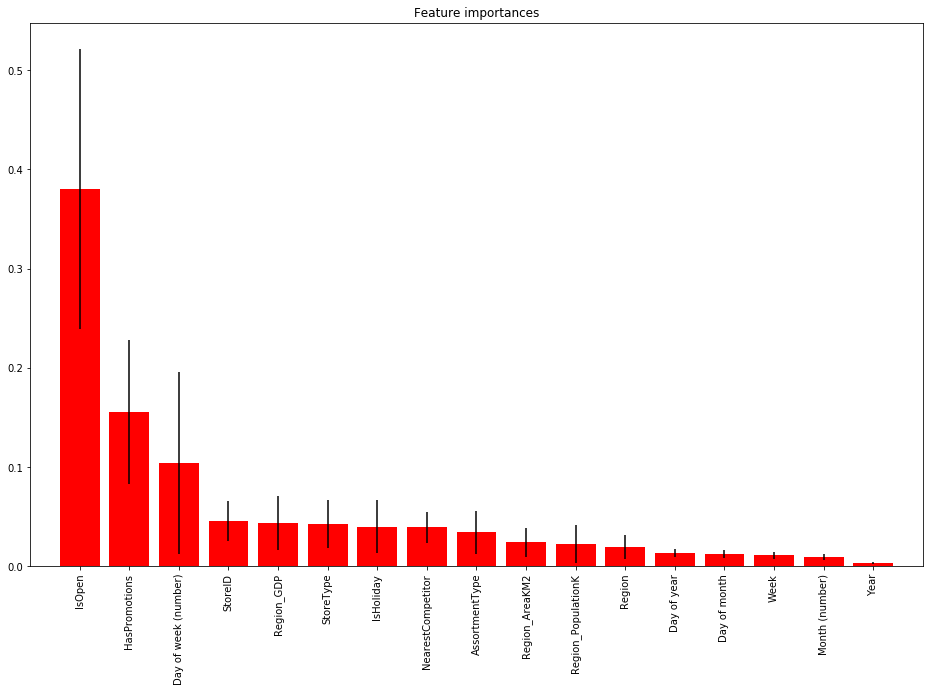

Optimal number of features : 17
Best features : Index(['AssortmentType', 'Day of month', 'Day of week (number)', 'Day of year',
       'HasPromotions', 'IsHoliday', 'IsOpen', 'Month (number)',
       'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP',
       'Region_PopulationK', 'StoreID', 'StoreType', 'Week', 'Year'],
      dtype='object')
Original features : Index(['AssortmentType', 'Day of month', 'Day of week (number)', 'Day of year',
       'HasPromotions', 'IsHoliday', 'IsOpen', 'Month (number)',
       'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP',
       'Region_PopulationK', 'StoreID', 'StoreType', 'Week', 'Year'],
      dtype='object')


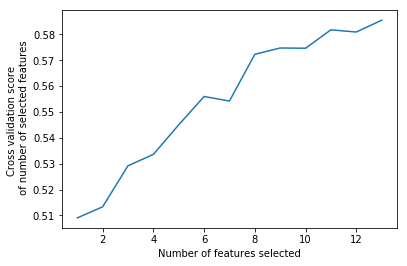

<Figure size 432x288 with 0 Axes>

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#forest = RandomForestRegressor(n_estimators=242, n_jobs=-1, random_state=0)
start=time.time()
forest = ExtraTreesRegressor(n_estimators=250, 
                             n_jobs=-1, 
                             max_depth = 15, 
                             max_features = 2,
                             random_state=0)

forest.fit(trainDataset_X, trainDataset_y)
M_FitTime = time.time() - start
print(" ")
print(" ")
print("Measured Fit Time: ", M_FitTime)

UseTScv=True
if UseTScv:
    from sklearn.model_selection import TimeSeriesSplit
    #start=time.time()
    tscv = TimeSeriesSplit(n_splits=5)
    #scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=tscv, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )        
else:
    from sklearn.model_selection import KFold
    #start=time.time()
    kfolds = KFold(n_splits=5,shuffle=False,random_state=0)
    #scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=kfolds, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )
    
#XValidTime = time.time() - start

print(" ")
print(" ")
#print("Cross Validation Performance: ")
#print("Cross Validation Time: %0.2f" % (XValidTime))
#EV=scores['test_explained_variance'].mean()
#print(scores['test_explained_variance'])
#print("EV: %0.2f" % (EV))
##MAE is less sensitive to outliers, The contant value that minimizes the MAE is the median of the target values
#print(-1*scores['test_neg_mean_absolute_error'])
#MAE=-1*scores['test_neg_mean_absolute_error'].mean()
#print("MAE: %0.2f" % (MAE))
##MAE considers outliers, The contant value that minimizes the MSE is the mean of the target values
##If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
##It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
#print(-1*scores['test_neg_mean_squared_error'])
#MSE=-1*scores['test_neg_mean_squared_error'].mean()
#print("MSE: %0.2f" % (MSE))
#print(np.sqrt(-1*scores['test_neg_mean_squared_error']))
#RMSE=np.sqrt(-1*scores['test_neg_mean_squared_error'].mean())
#print("RMSE: %0.2f" % (RMSE))
##Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
#print("XV R2 Actuals:",scores['test_r2'])
#R2=scores['test_r2'].mean()
#print("Cross Validation R2: %0.2f" % (R2))
#print("XVR_fit_time Actuals: ", (scores['fit_time']))
#XVR_FT=scores['fit_time'].mean()
#print("XVR_fit_time: %0.2f" % (XVR_FT))
#print("score_time Actuals: ", (scores['score_time']))      
#ST=scores['score_time'].mean()
#print("score_time: %0.2f" % (ST))
Params=forest.get_params(deep=True)
#print(" ")
#print(" ")
print("Model Parameters: ")
print(Params)
print(" ")
print(" ")

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
d=[]
for f in range(trainDataset_X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], trainDataset_X.columns[indices[f]], importances[indices[f]]))
    d.append({'Feature': trainDataset_X.columns[indices[f]]})

from sklearn.feature_selection import RFECV
selector = RFECV(forest, step=1, cv=tscv, min_features_to_select=5,n_jobs=-1,verbose=0)
selector = selector.fit(trainDataset_X, trainDataset_y)
print(selector.support_)
print(selector.ranking_)
print("Optimal number of features : %d" % selector.n_features_)
print("Cross Validation scores:")
print(selector.grid_scores_)

trainDataset_XS=pd.DataFrame(trainDataset_X[trainDataset_X.columns[selector.support_]])
#print(trainDataset_XS.head(3))

FI=[]
importancesS = selector.estimator_.feature_importances_
indicesS = np.argsort(importancesS)[::-1]
for f in range(trainDataset_XS.shape[1]):
    #print("%d. feature %d %s (%f)" % (f + 1, indicesS[f], trainDataset_XS.columns[indicesS[f]], importancesS[indicesS[f]]))
    FI.append({'Rank':f+1, 'Feature':trainDataset_XS.columns[indicesS[f]], 'Importance':importancesS[indicesS[f]]})
	
Feat_Imp = pd.DataFrame(FI)
print(Feat_Imp)
#print(flow_variables)
print(trainDataset_X.shape)
print(trainDataset_XS.shape)

# Plot the feature importances of the forest
plt.figure(figsize=(16,10))
plt.title("Feature importances")
plt.bar(range(trainDataset_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(trainDataset_X.shape[1]), trainDataset_X.columns[indices],rotation=90)
plt.xlim([-1, trainDataset_X.shape[1]])
plt.show()


print('Optimal number of features :', selector.n_features_)
print('Best features :', trainDataset_X.columns[selector.support_])
print('Original features :', trainDataset_X.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()
plt.savefig('C:\\Benchmarking\\FeatureImportance.png')
output_table = trainDataset_XS.join(trainDataset_y, lsuffix='_X', rsuffix='_y')

## Univariate Feature Selection 
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

feature_selection_univariate_model = SelectKBest(mutual_info_regression, k=4)
X_selected_features_univariate = feature_selection_univariate_model.fit_transform(trainDataset_X,trainDataset_y)
print("Reduced data set shape is ",X_selected_features_univariate.shape)

mask = feature_selection_univariate_model.get_support() #list of booleans
print("Selected features = ",data.feature_names[mask])

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


KeyboardInterrupt: 

## Principal Component Analysis
We now apply principal component analysis. Since we need to decide how many component to select and for this purpose we apply PCA and plot the explained variance ratio and the cumulative explained variance.

In [ ]:
from sklearn.decomposition import PCA
full_pca_model = PCA()
full_fitted_model = full_pca_model.fit(trainDataset_X)
print(full_fitted_model.explained_variance_ratio_)

In [ ]:
plt.semilogy(full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,12,1));
plt.xlabel("Features")
plt.ylabel("Cumulative Explained Variance Ratio")

As we can note, four components can actually explain most of the variance in the data so we apply PCA and select the first four components.

In [ ]:
feature_selection_pca_model = PCA(n_components=4)
fitted_model = feature_selection_pca_model.fit(trainDataset_X)

X_selected_features_pca = fitted_model.transform(trainDataset_X)
print("Explained Variance: %s" % fitted_model.explained_variance_ratio_)
print("Reduced data set shape is ", X_selected_features_pca.shape)

# Tests:

## Pattern Search Matlab Method: (Worse results than Hooke-Jeeves)
### Reference:
https://www.mathworks.com/videos/global-optimization-with-matlab-products-81716.html (Time: 43:20)

Best Parameters Found (Hooke-Jeeves Method):
n_estimators     7.000000
max_features     4.000000
max_depth       16.000000
score            0.555353
Name: 9, dtype: float64
12           7.0           4.0       15.0  0.538425

Best Parameters Found (MATLAB Method:)
n_estimators    7.000000
max_features    4.000000
max_depth       8.000000
score           0.553186
Name: 15, dtype: float64
23           7.0           4.0        7.0  0.530708


In [140]:
#Run This cell and then the "#Execute Pattern Search:" cell
class PatternSearchCV(BaseSearchCV2):
    _required_parameters = ["estimator", "param_distributions"]

    def __init__(self, estimator, param_distributions, scoring=None, #n_iter=10,
                 n_jobs=None, iid='warn', refit=True,
                 cv='warn', verbose=0, pre_dispatch='2*n_jobs',
                 random_state=None, error_score='raise-deprecating',
                 return_train_score=False):
        self.param_distributions = param_distributions
        #self.n_iter = n_iter
        self.random_state = random_state
        super().__init__(
            estimator=estimator, scoring=scoring,
            n_jobs=n_jobs, iid=iid, refit=refit, cv=cv, verbose=verbose,
            pre_dispatch=pre_dispatch, error_score=error_score,
            return_train_score=return_train_score)
        self.ResultDf = pd.DataFrame()

#     param_dist={'n_estimators':[230,240,250],
#            'max_features':[2,3],
#            'max_depth':[16,17,30]}        
        
        class Dimension():
            def __init__(self, value):
                #If value is a Tuple, divide the interval into "length" equaly spaced intervals:
                if isinstance(value,tuple):
                   lower=value[0];upper=value[1];length=value[2]
                   value=[lower + x*(upper-lower)/(length-1) for x in range(length)]
                self.value=value
                self.value.sort()
                self.min=self.value[0]
                self.max=self.value[-1]
                self.midptidx=int((len(self.value)/2)-0.5)
                self.midpoint=self.value[self.midptidx]
                self.Delta=(len(value)-1)-self.midptidx
                self.BestValue=self.midpoint
                self.CurrIndex=self.midptidx
                self.BestIndex=self.midptidx
        
        self.Space={}
        for Dkey, Dval in param_dist.items():
            self.Space[Dkey]=Dimension(Dval)
            print(Dkey,":",Dval) 

    def _run_search(self, evaluate_candidates):
        """Search best parameters using Pattern Search Method"""
        alfa=2;Episilon=0.001 ;k=0
        Ndimensions=len(self.Space); 

        xc={}; xd={}; xb={}
        #builds the first exploratory point by collecting the midpoint of each dimension:
        for Dkey, Dval in self.Space.items():
            xc[Dkey]=Dval.midpoint   

        for CurDim in range(0,Ndimensions): #divide Delta by 2
            #print("Dividing delta by 2:")
            list(self.Space.values())[CurDim].Delta=int(0.5+list(self.Space.values())[CurDim].Delta/alfa)

        DeltaVector=[]
        for CurDim in range(0,Ndimensions):
            DeltaVector.append(list(self.Space.values())[CurDim].Delta)
        print(" ")
        print("Current Delta values for each dimension: ", DeltaVector)

        #Evaluate the first point as the midpoint of the search space:
        BestScore = evaluate_candidates([xc])['mean_test_score'][-1]
        print(" ")
        print(xc)

        cols=list(xc.keys())
        cols.append('score')
        df=pd.DataFrame(columns=cols)
        xd=xc.copy()
        xd.update({'score':BestScore})
        df=df.append(xd, ignore_index=True)
        print(df)

        BestIdx=0; InitialExploration=0


        # i=exploratory moves iterations; k=Overall Iterations
        i=0; Continue=0

        while Continue<3:
            #Exploratory Search:
            while i < Ndimensions:
                k+=1
                #print("Iteration k:",k)
                print("Dimension: ",i+1)
                for Direction in [1,-1]:
                    xn={}; xd={}
                    for CurDim in range(0,Ndimensions): #Build the vextor xn:
                        if i == CurDim:
                            NewIndex=list(self.Space.values())[CurDim].CurrIndex + Direction*list(self.Space.values())[CurDim].Delta
                            if NewIndex>len(list(self.Space.values())[CurDim].value)-1: NewIndex=len(list(self.Space.values())[CurDim].value)-1
                            if NewIndex<0: NewIndex=0
                            xn[list(self.Space.keys())[CurDim]]=list(self.Space.values())[CurDim].value[NewIndex]
                        else:
                            CurrInd=list(self.Space.values())[CurDim].CurrIndex
                            if CurrInd>len(list(self.Space.values())[CurDim].value)-1: CurrInd=len(list(self.Space.values())[CurDim].value)-1
                            if CurrInd<0: CurrInd =0
                            xn[list(self.Space.keys())[CurDim]]=list(self.Space.values())[CurDim].value[CurrInd]
                    if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
                        print(Direction, xn)            
                        CurrScore = evaluate_candidates([xn])['mean_test_score'][-1]
                        #cols=list(xn.keys())
                        #cols.append('score')
                        xd=xn.copy()
                        xd.update({'score':CurrScore})
                        df=df.append(xd, ignore_index=True)
                        print(df)
                        #print(CurrScore)
                        if CurrScore > BestScore: 
                            BestScore=CurrScore
                            list(self.Space.values())[i].BestValue=list(self.Space.values())[i].value[NewIndex]
                            list(self.Space.values())[i].BestIndex=NewIndex
                            xb=xn.copy()
                            BestIdx=k-1
                            #break
                #list(self.Space.values())[i].CurrIndex=list(self.Space.values())[i].BestIndex 
                i+=1
            xd={}    
            NotEqual=False
            for Dkey, Dval in self.Space.items():
                #print(Dval.CurrIndex,Dval.BestIndex)
                if Dval.CurrIndex != Dval.BestIndex: NotEqual=True
            print(" ");print(" ");
            #print("NotEqual =",NotEqual)
            DeltaVector=[]
            if NotEqual:
                for CurDim in range(0,Ndimensions): #update Current index to Best Point:
                    list(self.Space.values())[CurDim].CurrIndex=list(self.Space.values())[CurDim].BestIndex
                    #xd[list(self.Space.keys())[CurDim]]=list(self.Space.values())[CurDim].BestValue
                    #BestIndex=list(self.Space.values())[CurDim].BestIndex
                    #xn[list(self.Space.keys())[CurDim]]=list(self.Space.values())[CurDim].value[BestIndex]
                #print("xn: ",xn)
                #print("xd:", xd)
                print("Best vector so far (xb):",xb) 
                #print(df.loc[df['score'].idxmax()])
                #Multiply delta by 2
                print("multiplying delta by 2:")
                for CurDim in range(0,Ndimensions):
                    list(self.Space.values())[CurDim].Delta=int(0.5+list(self.Space.values())[CurDim].Delta*alfa)
                    DeltaVector.append(list(self.Space.values())[CurDim].Delta)
            else:
                print("Dividing delta by 2:")
                for CurDim in range(0,Ndimensions): #Stay in current point and divide Delta by 2
                    list(self.Space.values())[CurDim].Delta=int(0.5+list(self.Space.values())[CurDim].Delta/alfa)
                    DeltaVector.append(list(self.Space.values())[CurDim].Delta)

            print("Current Delta values for each dimension: ",DeltaVector)
            i=0 
            if DeltaVector==list(np.ones(3)): Continue+=1

        print(" ");print(" ")
        print("Best Parameters Found:")
        print(df.loc[df['score'].idxmax()])
        print(" ");print(" ")
        self.ResultDf=df


In [193]:
LearningRate = [0.14, 0.15, 0.16, 0.13, 0.13]
EvalMetric = ['RMSE','R2']
max_depth= [4,5,7,8]
print(type(LearningRate))
print(len(LearningRate))
print(LearningRate[int((len(LearningRate)/2)-0.5)])
print(LearningRate[0])
print(LearningRate[len(LearningRate)-1])

<class 'list'>
5
0.16
0.14
0.13


In [225]:
from hyperopt import hp

# Create the domain space
#LearningRate = hp.uniform('LearningRate', 0.14, 0.16)
#EvalMetric = hp.choice('EvalMetric',['RMSE','R2','MAE'])
#max_depth=hp.choice('max_depth', [4,5])
#print(type(EvalMetric))
space={'LR': hp.uniform('LearningRate', 0.14, 0.16),
       'EvalMetric': hp.choice('EvalMetric',['RMSE','R2','MAE']),
       'Max_depth': hp.choice('max_depth', [4,5])
      }
from hyperopt.pyll.stochastic import sample
samples=[]
print(type(samples))
for _ in range(5):
    samples.append(sample(space))
print(samples[0])
print(samples[0]['EvalMetric'])

<class 'list'>
{'EvalMetric': 'R2', 'LR': 0.1433033736034484, 'Max_depth': 4}
R2


In [34]:
a={}
?a
a['RMSE']=4
a

{'RMSE': 4}

## Calculate Feature importances and Graph:

Categorical Columns:
Index(['StoreType', 'AssortmentType'], dtype='object')
 
 
Head of Training Data:
   StoreID  IsHoliday  IsOpen  HasPromotions  StoreType  AssortmentType  \
0     1000          0       1              0          0               0   
1     1000          0       1              0          0               0   
2     1000          0       1              0          0               0   

   NearestCompetitor  Region  NumberOfSales  Region_AreaKM2  Region_GDP  \
0                326       7           5676            9643       17130   
1                326       7           8111            9643       17130   
2                326       7           8300            9643       17130   

   Region_PopulationK  Year  Month (number)  Week  Day of year  Day of month  \
0                2770  2016               3    10           61             1   
1                2770  2016               3    10           62             2   
2                2770  2016               3    10      

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
 
Measured Fit Time:  1.0066440105438232
Using Time Series Cross Validation
 
 
Cross Validation Performance: 
Cross Validation Time: 8.94
[0.65366408 0.50842293 0.47459996 0.61972558 0.39699894]
EV: 0.53
[1049.49583483 1371.75359231 1321.84140112 1028.53560687 1305.02858933]
MAE: 1215.33
[2457903.34035326 4386336.06559434 3677100.90866691 2740695.37281478
 5999530.01001014]
MSE: 3852313.14
[1567.77018097 2094.35815122 1917.57683253 1655.50456744 2449.3938046 ]
RMSE: 1962.73
XV R2 Actuals: [0.59961468 0.50834681 0.47195162 0.61962855 0.39681197]
Cross Validation R2: 0.52
XVR_fit_time Actuals:  [1.7638638  0.40660071 0.53040123 0.73700309 0.96720171]
XVR_fit_time: 0.88
score_time Actuals:  [0.45340085 0.43680072 0.45240045 0.45240092 0.43780088]
score_time: 0.45
 
 
Converting Validation Categorical Columns to Numbers:
 
 
Head of Validation Data:
   StoreID  IsHoliday  IsOpen  HasPromotions  StoreType  AssortmentType  \
0     1145          0       1              0          0         

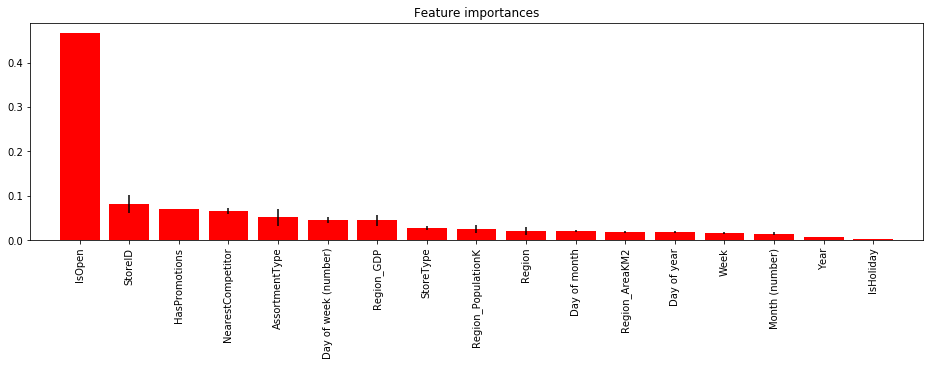

 
Model Parameters:
Win
7
3.6.7
sklearn
0.20.2
['Win', '7', 'Python', '3.6.7', 'sklearn', '0.20.2', 'ExtraTreesRegressor', 1.0066440105438232, 0.8810141086578369, 0.44656076431274416, 8.939087629318237, 0.5306822996170675, 1215.3310048931853, 3852313.1394878863, 1962.731041046604, 0.5192707252591598, 0.10920000076293945, 0.6028330361805241, 1109.069321244793, 2394670.5888502817, 1547.4723224827906, 0.6003824226912086, {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}, [{'1. feat: 6 IsOpen (0.466111)'}, {'2. feat: 13 StoreID (0.081406)'}, {'3. feat: 4 HasPromotions (0.070828)'}, {'4. feat: 8 NearestCompetitor (0.066025)'}, {'5. feat: 0 AssortmentType (0.051350)'}, {'6. feat: 2 Day of week

In [8]:
#Calculate Feature importances and Graph:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print(" ")
print(" ")
print("Feature Importances:")
global d
d=[]
for f in range(trainDataset_X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], trainDataset_X.columns[indices[f]], importances[indices[f]]))
    d.append({"%d. feat: %d %s (%f)" % (f + 1, indices[f], trainDataset_X.columns[indices[f]], importances[indices[f]])})

Feat_Imp = pd.DataFrame(d)

# Plot the feature importances of the forest

plt.figure(figsize=(16,4))
plt.title("Feature importances")
plt.bar(range(trainDataset_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(trainDataset_X.shape[1]), trainDataset_X.columns[indices],rotation=90)
plt.xlim([-1, trainDataset_X.shape[1]])
plt.show()

print(" ")
print("Model Parameters:")
Params


#InsertHeader()
InsertValues()
print('***Process Completed***')

## Load Train Set:

In [2]:
#Load Train Set:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
import csv
import sys
import gc
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
trainBench = pd.read_csv("c:/Benchmarking/trainBench.csv")
#testBench = pd.read_csv("c:/Benchmarking/testBench.csv")

trainBench = trainBench.drop("ID", axis=1)

cat_columns = trainBench.select_dtypes(['object']).columns
print("Categorical Columns:")
print(cat_columns)
trainBench[cat_columns] = trainBench[cat_columns].astype('category')
cat_columns = trainBench.select_dtypes(['category']).columns
trainBench[cat_columns] = trainBench[cat_columns].apply(lambda x: x.cat.codes)
Int64columns = trainBench.select_dtypes(['int64']).columns
#Int64columns
trainBench[Int64columns] = trainBench[Int64columns].astype(np.int32)
#trainBench.info()
mask = trainBench.columns.difference(['NumberOfSales'])
trainDataset_X = trainBench[mask]
print("Feature Columns:")
print(mask)
trainDataset_y = trainBench['NumberOfSales']
del trainBench
gc

Categorical Columns:
Index(['StoreType', 'AssortmentType'], dtype='object')
Feature Columns:
Index(['AssortmentType', 'Day of month', 'Day of week (number)', 'Day of year',
       'HasPromotions', 'IsHoliday', 'IsOpen', 'Month (number)',
       'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP',
       'Region_PopulationK', 'StoreID', 'StoreType', 'Week', 'Year'],
      dtype='object')


## Load Validation Set:

In [ ]:
#Load Validation Set:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

validBench = pd.read_csv("c:/Benchmarking/validBench.csv")
validBench = validBench.drop("ID", axis=1)
#Int64columns = validBench.select_dtypes(['int64']).columns
#Int64columns
validBench[Int64columns] = validBench[Int64columns].astype(np.int32)

print(" ")
print(" ")
print("Converting Validation Categorical Columns to Numbers:")
cat_columns
validBench[cat_columns] = validBench[cat_columns].astype('category')
cat_columns = validBench.select_dtypes(['category']).columns
validBench[cat_columns] = validBench[cat_columns].apply(lambda x: x.cat.codes)
print(" ")
print(" ")
print("Head of Validation Data:")
print(validBench.head(3))
print(" ")
print(mask)
validBench_X = validBench[mask]
validBench_y = validBench['NumberOfSales']

In [38]:
#Testing Time series cross validation:
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)
#scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=kfolds, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )

X = trainDataset_X
y = trainDataset_y
 
for train_index, test_index in tscv.split(y):
   print("TRAIN:", train_index, "TEST:", test_index)

   

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [    0     1     2 ... 16760 16761 16762] TEST: [16763 16764 16765 ... 33518 33519 33520]
TRAIN: [    0     1     2 ... 33518 33519 33520] TEST: [33521 33522 33523 ... 50276 50277 50278]
TRAIN: [    0     1     2 ... 50276 50277 50278] TEST: [50279 50280 50281 ... 67034 67035 67036]
TRAIN: [    0     1     2 ... 67034 67035 67036] TEST: [67037 67038 67039 ... 83792 83793 83794]
TRAIN: [    0     1     2 ... 83792 83793 83794] TEST: [ 83795  83796  83797 ... 100550 100551 100552]
